# Can you save the climate along with your pension? 

We wish to investigate wether one can obtain a reasonable return on investment in "green" stocks/ indexes compared to investing in a market index as SP500 or a controversial oil company as ExxonMobil over a 5 year period 2014-2019. 

In [1]:
import pandas as pd 
import pandas_datareader
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

**Reading stock index data**

**Data source** 

We read price data from The Investors Exchange (IEX), where we have chosen the following four stocks and indexes: 

- S&P500 Index (SPY) which contains the 500 largest American companies.
- Exxon Mobil Corporation (XOM) - Stock of a big American oil and gas company. There have been some controverse around this company, and it has been involved in a series of environmental scandals. 
- Invesco Global Clean Energy (PBD) is an index, who (at least) invest 90% of their capital in the WilderHill New Energy Global Innovation Index. The WilderHill index  contains of companies who focuses on cleaner energy, conservation, efficiency and advancing renewable energy.
- S&P Clean Energy index fund (ICLN) is an index fund who invest in a portfolio of 31 "clean- energy" companies. 

Additionally we read prices for crude oil from Federal Reserve Bank of ST.LOUIS. 

In [2]:
# We look at stock prices over 5 years 
start = datetime.datetime(2014,1,1)
end   = datetime.datetime(2019,1,1)

In [3]:
firms = [] 
for i,stock_name in enumerate(['PBD','XOM', 'ICLN','SPY']): 
    firm_stock = pandas_datareader.iex.daily.IEXDailyReader(stock_name, start, end).read()
    firm_stock['firm'] = stock_name
    firms.append(firm_stock)

In [4]:
stocks = pd.concat(firms) # Concatination of firms
# convert index from type 'O' to 'datetime' - can be manipulated better 
stocks.index = pd.to_datetime(stocks.index)

**Describtives**

Denote the closing price at time $t$ for firm/index $i$:  $x_{it}$.
We calculate the time average/mean value as: $$\bar x_{i} = \frac{1}{T} \sum_{t=1}^T x_{it}$$
Additionally we can calculate the standard deviation as, $ std = \sqrt(S^2) $ where $$ S^2 = \frac{1}{T-1} \sum_{t=1}^T (x_{it} - \bar x_{i})^2 $$
Furthermore  we report the number of observations $T$, the min and max and certain quantiles: 25%,75% and median.


In [5]:
# Descriptives closing price
stocks.groupby('firm')['close'].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
ICLN,1194.0,8.881282,0.853989,7.0938,8.291550,8.71435,9.34310,11.6551
PBD,1194.0,11.340768,1.029364,8.7548,10.508975,11.31050,12.32020,13.4884
SPY,1194.0,216.782762,34.635721,164.3924,189.483400,204.04505,247.89760,289.2859
XOM,1194.0,76.532158,4.962651,59.6434,73.573375,76.85100,79.62585,87.1248


There is a clear difference in the levels of stock and index prices, with an average price of S&P500 (SPY) at 216.667 compared to the others. This makes the different investments' evolution hard to campare in the following: 

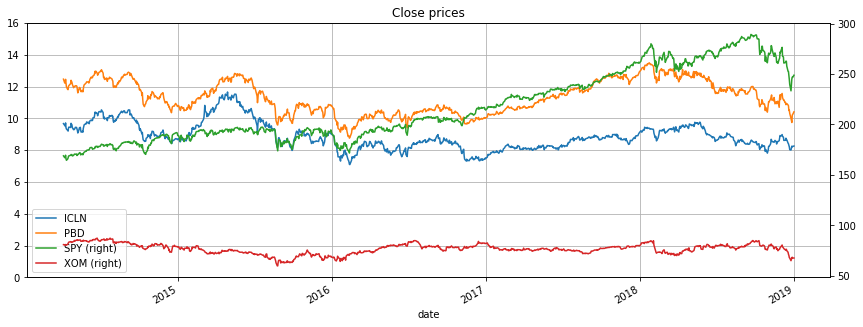

In [6]:
# Plots of all in one 
stocksplt = stocks.groupby('firm')['close']
stocksplt.plot(secondary_y = ["SPY","XOM"], 
               legend = True, grid = True, figsize = [14.4, 5.2], ylim= (0, 16), title = 'Close prices');


We tried having only one scaling axis, but then the variation of the green indexes (ICLN) and (PBD) wasn't obvious and appeared as completely flat. 
Thus, the graph above has two seperate scales: 
S&P500 (SPY) and ExxonMobil (XOM) are scaled to the right and the green indexes (ICLN) and (PBD) are scaled on the left axis. 
 

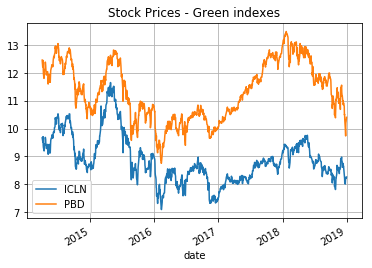

In [7]:
# Plot of only green indexes
green_stocks = stocks.loc[stocks['firm'].isin(['ICLN','PBD'])]
green_stocks.groupby('firm')['close'].plot(legend=True, grid = True); 
plt.title('Stock Prices - Green indexes');

It's clear from the last plot that the prices of the "green indexes" are highly correlated.

Both, summary statistics and plot of stock prices indicate that we can't compare the levels of the stock prices. 

We considered two options: Normalizing prices or the industry practice of calculating and comparing the returns of the stocks and indexes. We chose the latter option: 

Let log returns be defined as: $r_t = log(x_t) - log(x_{t-1})$.

Note: Markets are closed at weekends and some holidays, thus lagged closing values $x_{t-1}$ refer to the previous trading day's closing price, not previous day's closing price. 

In [8]:
# Lagged close value - by firm
stocks['close_lagged'] = stocks.groupby('firm')['close'].shift(1)

# Log returns
stocks['Log_returns'] = np.log(stocks['close'])-np.log(stocks['close_lagged'])


In [9]:
# Descriptives - Log returns
stocks.groupby('firm')['Log_returns'].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
ICLN,1193.0,-0.000132,0.012678,-0.052876,-0.007109,0.000000,0.007206,0.050350
PBD,1193.0,-0.000151,0.011481,-0.059694,-0.006021,0.000303,0.006371,0.052511
SPY,1193.0,0.000325,0.008371,-0.042722,-0.002943,0.000486,0.004498,0.049290
XOM,1193.0,-0.000151,0.011844,-0.058586,-0.006046,0.000000,0.005973,0.053692


When looking at daily log retrurns, we note that S&P500 (SPY) have a higher average return and lowest variation . Where both the oil company Exxon (XOM) and both green indexes have a negative average return and a higher variation.  By ONLY looking at these two performance metrics, an investor whose preference is for higher expected returns and lower variance (risk averse), would have prefered investing in S&P500.  But it should be noted, when looking at the median all returns are nonnegative but still the return of S&P500 being highest. 

Additionally we lead to the attention that this result might not be generalized for all time periods: This is a limited 5 year sample and high returns in past, does not guarantee future high returns. 

**Plots of the return series**

In [10]:
# From long to wide format
log_returns = stocks.pivot( columns = 'firm', values = 'Log_returns')

Text(0.5, 1.0, 'PBD index')

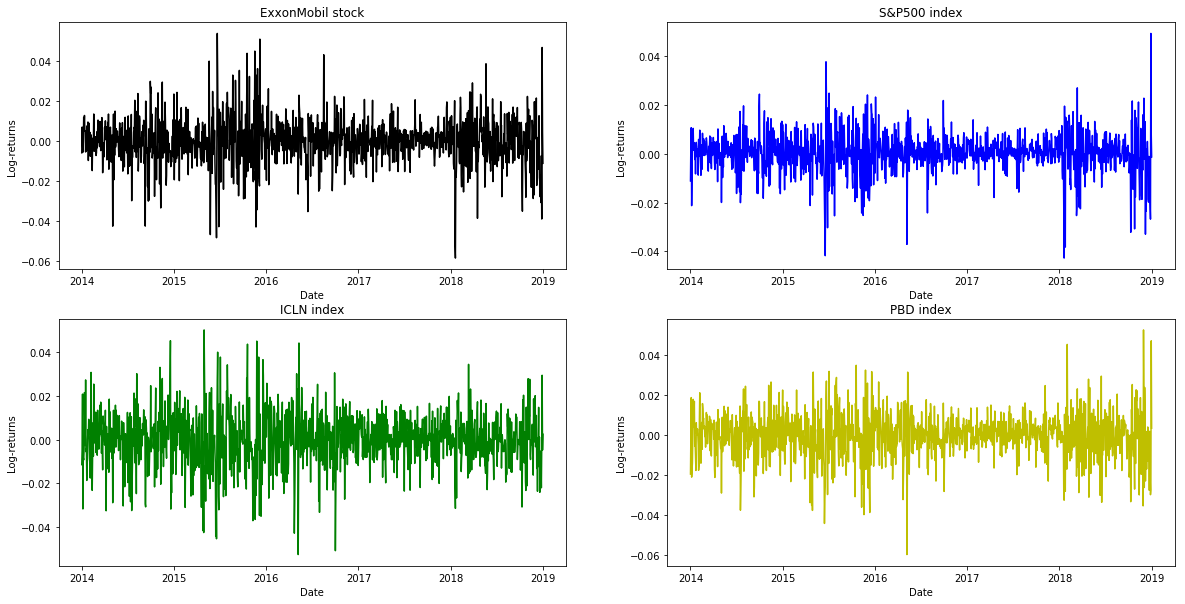

In [11]:
# Plot of individual return series

x = np.linspace(2014, 2019, 1192)

f = plt.figure()

f.set_figheight(10)
f.set_figwidth(20)

plt.subplot(2,2,1)
plt.plot(x,log_returns['XOM'][1:-1],'k')
plt.xlabel('Date')
plt.ylabel('Log-returns')
plt.title('ExxonMobil stock')

plt.subplot(2,2,2)
plt.plot(x,log_returns['SPY'][1:-1],'b')
plt.xlabel('Date')
plt.ylabel('Log-returns')
plt.title('S&P500 index')

plt.subplot(2,2,3)
plt.plot(x,log_returns['ICLN'][1:-1],'g')
plt.xlabel('Date')
plt.ylabel('Log-returns')
plt.title('ICLN index')

plt.subplot(2,2,4)
plt.plot(x,log_returns['PBD'][1:-1],'y')
plt.xlabel('Date')
plt.ylabel('Log-returns')
plt.title('PBD index')


We note that these returns display several of different stylized facts of returns: 

- Almost null persistence in the returns and the returns series seem stationary reverting back to their mean around 0. 
- Time varying volatility. 
- Large spikes in the returns and volatility clustering: Periods of high volatility is followed by periods of high volatility and vice verca. 

Additionally, leverage effects (negative shocks having a bigger influence on variance) might also be present but these are difficult to verify visually. 


The general modelframework which is usually used for modeling returns and formally investigating and testing the above phenomena, is labeled Autoregressive Conditionally Heteroscedastic (ARCH) models. 

**Distribution of returns**

As mentioned in article ”Recipe for Disaster: The Formula That Killed Wall Street” returns exhibit "fat-tails" and is thus not normally distributed. We investigate this by both looking at histograms, and formally testing this by a KS test for normality.



**Histograms**

In this section, we plot the empirical distributions.

In [12]:
# Sort the columns and exclude the index 0 value 
PBD = sorted(log_returns['PBD'][1:-1])
XOM = sorted(log_returns['XOM'][1:-1])
ICLN = sorted(log_returns['ICLN'][1:-1])
SPY = sorted(log_returns['SPY'][1:-1])

<Figure size 432x288 with 0 Axes>

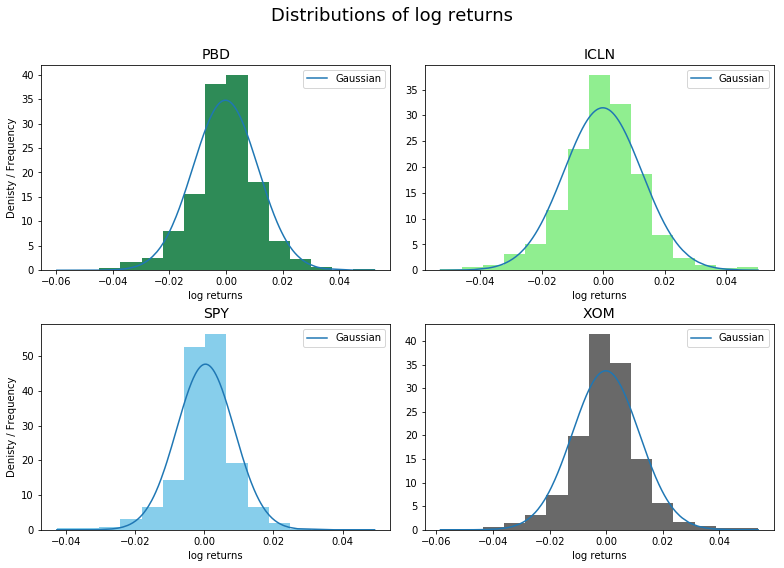

In [13]:
# Plot histograms and gaussian reference distributions 

#PBD : 
fig_densities = plt.figure()
normal_PBD = stats.norm.pdf(PBD,np.mean(PBD),np.std(PBD))
plt.subplots(nrows=2,ncols=2,figsize=(11,8))
plt.subplot(2,2,1)
plt.gca().set_title('PBD',fontsize=14)
plt.xlabel('log returns')
plt.ylabel('Denisty / Frequency')
plt.plot(PBD,normal_PBD,label='Gaussian')
plt.legend()
plt.hist(PBD,density=True,color='seagreen',bins=15)

#ICLN : 
normal_ICLN = stats.norm.pdf(ICLN,np.mean(ICLN),np.std(ICLN))
plt.subplot(2,2,2)
plt.gca().set_title('ICLN',fontsize=14)
plt.xlabel('log returns')
plt.plot(ICLN,normal_ICLN, label='Gaussian')
plt.legend()
plt.hist(ICLN,density=True,color='lightgreen',bins=15)

#SPY : 
normal_SPY = stats.norm.pdf(SPY,np.mean(SPY),np.std(SPY))
plt.subplot(2,2,3)
plt.gca().set_title('SPY',fontsize=14)
plt.xlabel('log returns')
plt.ylabel('Denisty / Frequency')
plt.plot(SPY,normal_SPY,label='Gaussian')
plt.legend()
plt.hist(SPY,density=True,color='skyblue',bins=15)

#XOM : 
normal_XOM = stats.norm.pdf(XOM,np.mean(XOM),np.std(XOM))
plt.subplot(2,2,4)
plt.gca().set_title('XOM',fontsize=14)
plt.xlabel('log returns')
plt.plot(XOM,normal_XOM,label='Gaussian')
plt.hist(XOM,density=True,color="dimgray",bins=15)
plt.suptitle('Distributions of log returns',fontsize=18)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.legend()
plt.show()

When visually looking at the different empirical distributions of log returns, it's hard to determine wether these are in fact gausian distributed. We expected to see even "fatter" tails for the return series, with more probability mass for extreme returns. In the next section we formally test for normality. 

In [14]:
# Testing for normality - KS test
# Under the null the returns are normal distributed!
print(stats.kstest(log_returns['XOM'][1:-1], 'norm'))
print(stats.kstest(log_returns['ICLN'][1:-1], 'norm'))
print(stats.kstest(log_returns['PBD'][1:-1], 'norm'))
print(stats.kstest(log_returns['SPY'][1:-1], 'norm'))

# Create F-string, pænerer på!


KstestResult(statistic=0.4797094023541195, pvalue=0.0)
KstestResult(statistic=0.4810539395064013, pvalue=0.0)
KstestResult(statistic=0.48370285983394656, pvalue=0.0)
KstestResult(statistic=0.48758222722920397, pvalue=0.0)


From all 4 test we obtain significant test statistics with p-values around 0, and we reject the null on a $\alpha=5 \% $ significance level for each seperate case. Thus, we conclude that the returns are not gaussian/normal. 

**Annualized returns**

Up till this point we have only looked at daily returns, on a day to day basis. Usually investors are interested in investing over longer time periods. How much would my return have been on average for a year over this 5 year period? To investigate this question we calculate the annualized returns using the formula below  

$$Annual \space return = \left(\frac{r_{t_1}}{r_{t_0}}\right)^\left(\frac{1}{t_1-t_0}\right) - 1$$

This is also known as a compound annual growth rate or 'CAGR'. 


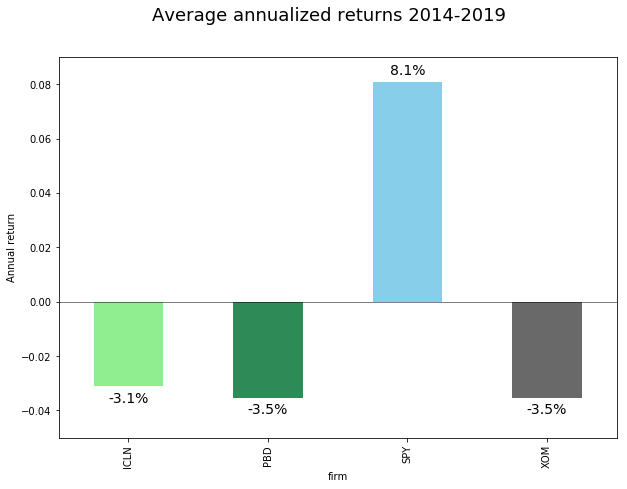

In [15]:
# **Annualized returns**

# From long to wide format
closing_prices = stocks.pivot( columns = 'firm', values = 'close')  

# Calculate annualized returns
annual_return = (closing_prices.iloc[-1]/closing_prices.iloc[0])**(1/5)-1.00

# Plot bar chart of annualized returns
AR_plot = annual_return.plot(kind = 'bar', figsize =(10,7),
                             color=['lightgreen','seagreen','skyblue','dimgray'])
AR_plot.set_ylabel('Annual return')
AR_plot.set_ylim(bottom = -0.05, top=0.09)
plt.suptitle('Average annualized returns 2014-2019', fontsize=18)
plt.axhline(linewidth=0.5,color='k')

# Add labels above bars 

def add_labels(AR_plot, spacing=5):

    """Add labels above/below each bar in a bar chart

         Arguments:
                    AR_plot: The matplotlib object containing the relevant axes. 
                    spacing: Distance between labels and bars (int). 
    """

    for i in AR_plot.patches: 
        y_value = i.get_height()
        x_value = i.get_x() + i.get_width() / 2 
    
        space = spacing
        
        #Vertical allignment for positive values:
        va = 'bottom'
    
        # If the value is negative: Place label below the bar. 
        if y_value < 0:
            
            #Invert space: 
            space *= -1
            
            # Vertical allignment for negative values:
            va = 'top'
        
        # Turn y-value into percent, format with one decimal place and concatenate with percentage sign
        label = str("{:.1f}".format(y_value*100))+'%'
    
        # Annotate with labels and place properly:
        AR_plot.annotate(label,(x_value,y_value),
                         xytext = (0, space),          # Vertically shift label by 'space' defined above
                         textcoords = 'offset points',
                         ha = 'center', va = va,       # Center label (horizontally)
                         fontsize=14)                  # and use different vertical alignment
                                                       # for neg. and pos. values, respectively.  

# Call the add_labels() function 
add_labels(AR_plot)

From looking at the bar-chart we can identify a clear winner of the S&P 500 index for with a average anuallized return above 8 percent over these 5 years. We note that the magnitude of the annualized returns is much bigger, than for the daily returns. This is due to the compounding effect of daily returns, small possitve(negative) returns will compound over time to create big differences on a yearly basis! 


Again we lead to attention that this result might be different for other time periods, and is not appropriate to use as an "forcasting - tool" for future returns. 

**Correlations**
The above descriptive analysis indicated, that investing in green indexes was an inferior option to investing in S&P500 over the years 2014-2019 atleast from an economic perspective. Can we explain why this was the case? Some theories suggest that the prices are influenced by the price of crude-oil. 
We investigate how the prices and returns of different assets/ indexes correlate with each other and with crude-oil prices.

Correlations:
$$\rho_{X,Y} = \frac{\text{Cov}(X,Y)}{\sqrt{S^2_X\cdot S^2_Y}}$$



In [16]:
# Correlations with closing prices 

# Reading oil and merging with existing closing price data
# Oil prices
oil = pandas_datareader.data.DataReader("DCOILWTICO", "fred", start, end)
#Rename collumn
oil.columns = ['Oil Prices'] 

# Merge data with previous closing prices
Merged_data = pd.merge(closing_prices, oil, left_index = True, right_index = True)

# Correlations 
Merged_data.corr()

,ICLN,PBD,SPY,XOM,Oil Prices
ICLN,1.000000,0.717939,-0.181893,0.089282,0.486843
PBD,0.717939,1.000000,0.376758,0.324839,0.605955
SPY,-0.181893,0.376758,1.000000,0.123375,-0.038043
XOM,0.089282,0.324839,0.123375,1.000000,0.650704
Oil Prices,0.486843,0.605955,-0.038043,0.650704,1.000000


The price of the Stock of ExxonMobil (XOM) have a high correlation of 65% with Oil Prices, which is alligned with our expecations. But, the green indexes (ICLN) and (PBD) also have a possitive and rather high correlation with crude oil prices. This might be explained by green energy being a substitute to oil: when prices on regular energy increases consumers substitute towards green energy. The S&P500 have a low correlation with oil prices.  Additionally it can be mentioned there is an high correlation of 71.8% between the prices of the green indexex.

In [17]:
# Correlations with log returns

# Merge data with log_returns 
Merged_data2 = pd.merge(log_returns, oil, left_index = True, right_index = True)

# Correlations 
Merged_data2.corr()



,ICLN,PBD,SPY,XOM,Oil Prices
ICLN,1.000000,0.760991,0.675650,0.457986,0.000896
PBD,0.760991,1.000000,0.663026,0.452009,-0.014383
SPY,0.675650,0.663026,1.000000,0.648188,0.015871
XOM,0.457986,0.452009,0.648188,1.000000,0.010999
Oil Prices,0.000896,-0.014383,0.015871,0.010999,1.000000


We have in general high correlations between the different returns of the stocks and indexes, with again the highest between the green indexes (ICLN) and (PBD). But it is interesting when looking at the log returns, the correlations with crude oil prices allmost vanish completely. This indicates that we can't really use oil prices when looking at returns of a stock. 

**Concluding remarks** 

The analysis presented in this project suggests that average returns have been higher while risk (measured by the standard deviation) has been lower for the S&P500 index compared to the two green indexes and the Exxon stock. Hence, using the terminology of the CAPM model this suggests that S&P500 'dominates' these indexes/stocks. However, it should be noted that the S&P500 index is far more diversified which, due to the principle of diversification, implies that S&P500 is subject to far less unsystematic risk than the indexes/stocks we compare it to in this analysis. Therefore, future work on this topic could presumably benefit from extending the analysis to include more diversified portfolios, e.g. socially responsible investing versus sinful investing. This would probably strengthen the analysis as the present analysis suffers from a comparison between highly diversified and poorly diversified portfolios and thus portfolios which are exposed to differet types of risk (i.e. unsystematic and systematic risk).   